In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


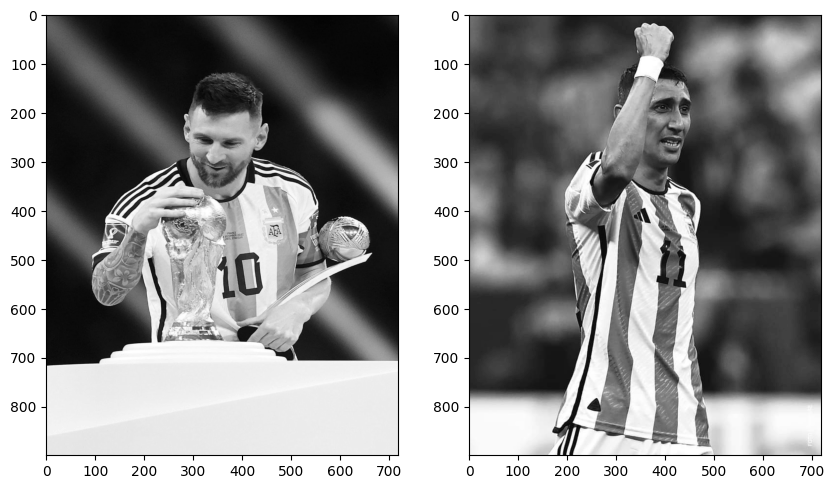

In [2]:
messi_img = cv2.imread('Messi.jpeg')
messi_img = cv2.cvtColor(messi_img, cv2.COLOR_BGR2GRAY)
messi_img = cv2.resize(messi_img, (720, 900))
demaria_img = cv2.imread('Demaria.jpeg')
demaria_img = cv2.cvtColor(demaria_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(messi_img, cmap='gray')
plt.subplot(122)
plt.imshow(demaria_img, cmap='gray')
plt.show()


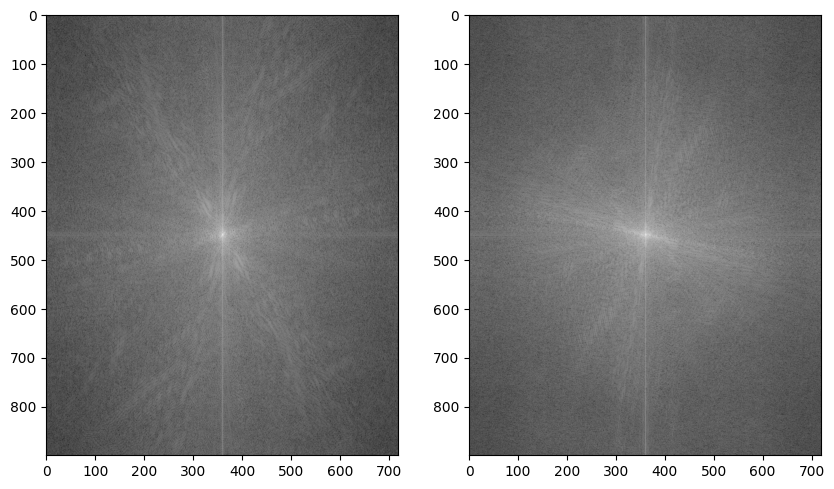

In [3]:
messi_fft = np.fft.fftshift(np.fft.fft2(messi_img))
demaria_fft = np.fft.fftshift(np.fft.fft2(demaria_img))

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(np.log(np.abs(messi_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(demaria_fft)), cmap='gray')
plt.show()


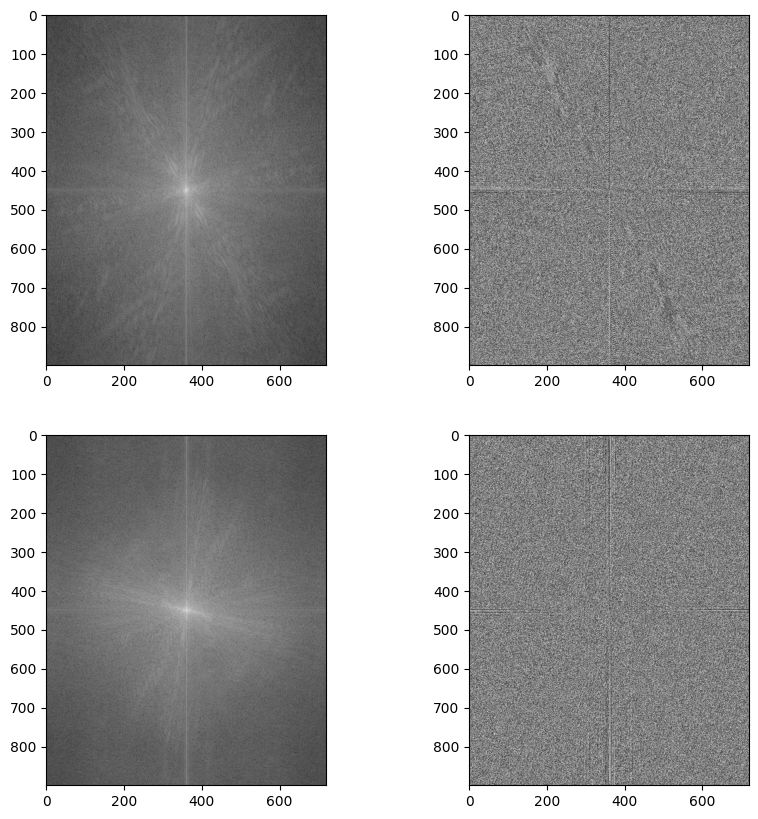

In [11]:
img1_amplitude = np.sqrt(np.real(messi_fft) ** 2 + np.imag(messi_fft) ** 2)
img1_phase = np.arctan2(np.imag(messi_fft), np.real(messi_fft))
img2_amplitude = np.sqrt(np.real(demaria_fft) ** 2 + np.imag(demaria_fft) ** 2)
img2_phase = np.arctan2(np.imag(demaria_fft), np.real(demaria_fft))


plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(np.log(img1_amplitude), cmap='gray')
plt.subplot(222)
plt.imshow(img1_phase, cmap='gray')

plt.subplot(223)
plt.imshow(np.log(img2_amplitude), cmap='gray')
plt.subplot(224)
plt.imshow(img2_phase, cmap='gray')


C:\Users\Msi gl\AppData\Local\Temp\ipykernel_4788\4082004913.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(new_img1_amplitude), cmap='gray')


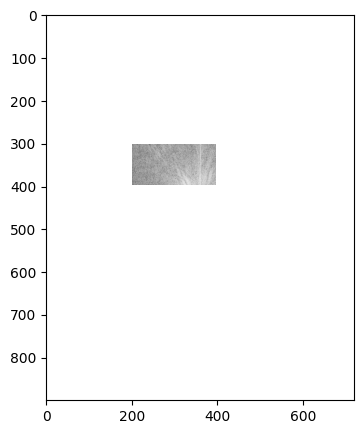

In [5]:

def fourier_masker(image, i):
    new_img1_amplitude = np.zeros((900, 720))
    
    new_img1_amplitude[300:400, 200:400] = img1_amplitude[300:400 , 200:400]
    
    plt.figure(figsize=(5, 5))
    plt.imshow(np.log(new_img1_amplitude), cmap='gray')
    plt.subplot(111)

fourier_masker(messi_img, 1)


C:\Users\Msi gl\AppData\Local\Temp\ipykernel_4788\272940527.py:31: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(new_img1_amplitude), cmap='gray')


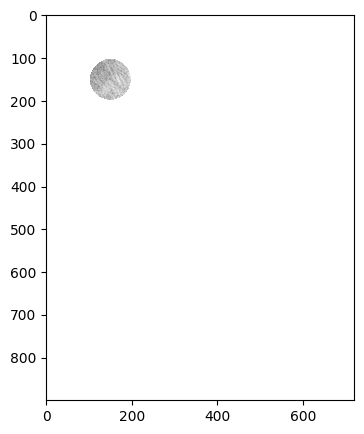

In [14]:
def fourier_ellpise_masker(image):
    
    x1 = 100
    x2 = 200

    y1 = 100
    y2 = 200

    x0 = (x2+x1)/2  # x center
    y0 = (y2+y1)/2  # y center

    half_width = (x2 - x1)/2
    half_height = (y2 - y1)/2

    x = list(range(x1, x2, 1))
    x = np.array(x, dtype=float)  # x values of interest
    y = list(range(y1, y2, 1))
    # y values of interest, as a "column" array
    y = np.array(y, dtype=float)[:, None]

    # True for points inside the ellipse
    ellipse = ((x-x0)/half_width)**2 + ((y-y0)/half_height)**2 <= 1
    ellipse = ellipse.astype(int)


    new_img1_amplitude = np.zeros((900, 720))
    new_img1_amplitude[x1:x2,y1:y2] = img1_amplitude[x1:x2,y1:y2]
    new_img1_amplitude[x1:x2,y1:y2] = new_img1_amplitude[x1:x2, y1:y2] * ellipse

    plt.figure(figsize=(5, 5))
    plt.imshow(np.log(new_img1_amplitude), cmap='gray')
    plt.subplot(111)

    return new_img1_amplitude

new_img1_amplitude = fourier_ellpise_masker(messi_img)


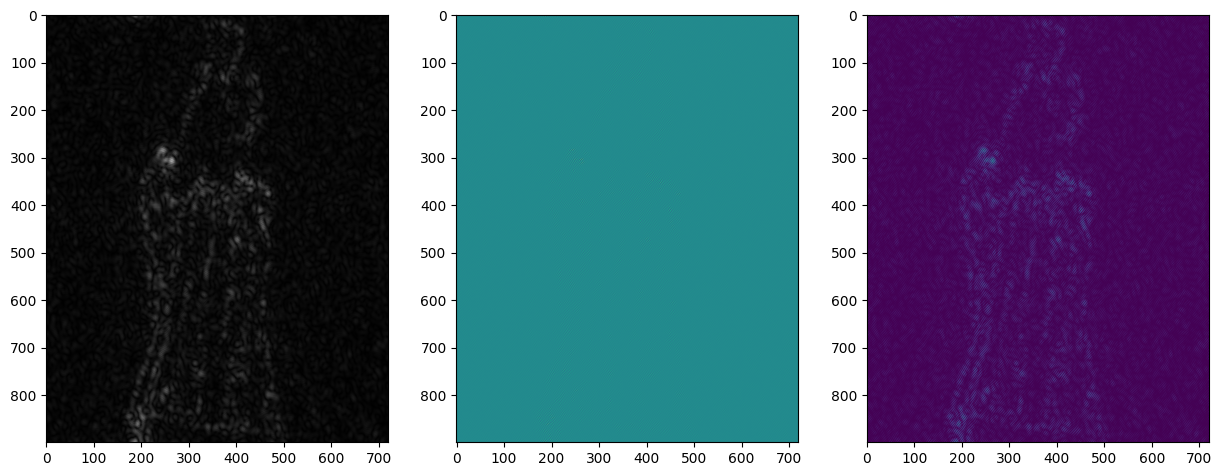

In [15]:
# amplitude_phase
messi_demaria_comb = np.multiply(new_img1_amplitude, np.exp(1j * img2_phase))
# drop imagniary as they are around 1e-14
messi_demaria = np.real(np.fft.ifft2(messi_demaria_comb))

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(15, 20))
plt.subplot(131)
plt.imshow(np.abs(messi_demaria), cmap='gray')
plt.subplot(132)
messi_demaria_shift = messi_demaria + messi_demaria.min()
messi_demaria_shift[messi_demaria_shift > 255] = 255
plt.imshow(messi_demaria_shift)
plt.subplot(133)
messi_demaria[messi_demaria > 255] = 255
messi_demaria[messi_demaria < 0] = 0
plt.imshow(messi_demaria)
